## Importation des données

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('SeoulBikeData.csv', sep=',')

In [3]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## Transformation des mots en chiffre

In [4]:
data['Holiday (int)'] = data['Holiday'].apply(lambda x: 0 if x == 'No Holiday' else 1)

data.loc[data['Seasons'] == 'Winter', 'Seasons (int)'] = 1
data.loc[data['Seasons'] == 'Spring', 'Seasons (int)'] = 2
data.loc[data['Seasons'] == 'Summer', 'Seasons (int)'] = 3
data.loc[data['Seasons'] == 'Autumn', 'Seasons (int)'] = 4

data['Functioning Day (int)'] = data['Functioning Day'].apply(lambda x: 1 if x == 'Yes' else 0)

data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Holiday (int),Seasons (int),Functioning Day (int)
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,1.0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,1.0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,0,1.0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,1.0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,0,1.0,1


In [5]:
df = data.drop(['Holiday', 'Date', 'Seasons', 'Functioning Day'], axis=1)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sn

## Visualisation de la matrice de corrélation

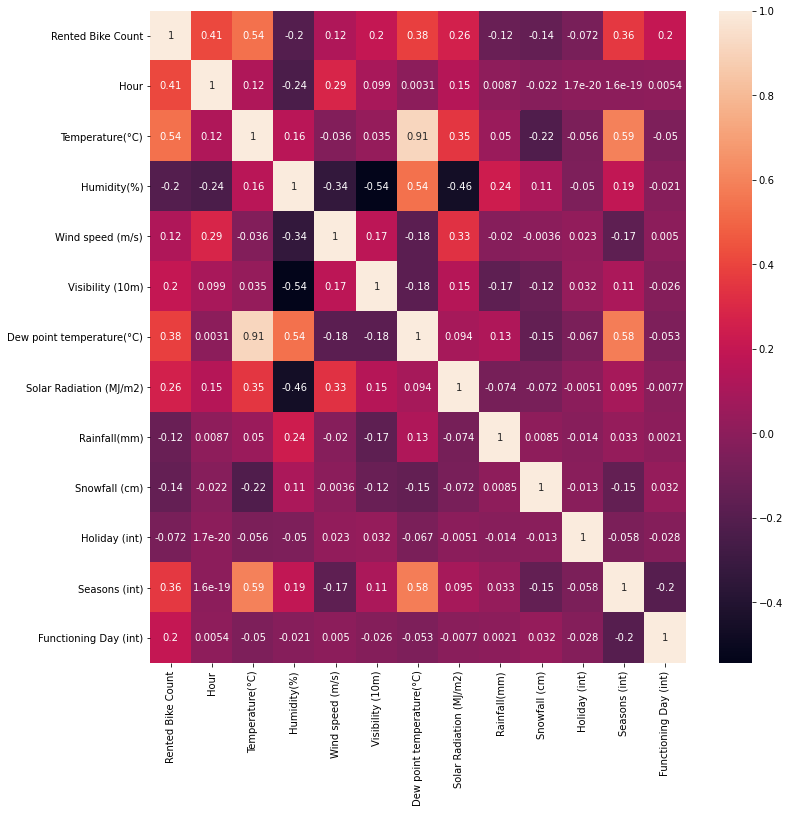

In [7]:
plt.figure(figsize = (12,12))
sn.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
import scipy.stats as stats

((array([-3.77775802, -3.55076281, -3.42605454, ...,  3.42605454,
          3.55076281,  3.77775802]),
  array([   0,    0,    0, ..., 3404, 3418, 3556], dtype=int64)),
 (606.0741732979587, 704.6020547945204, 0.9393283948644359))

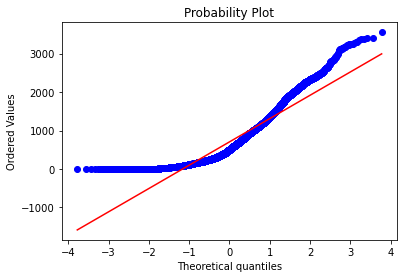

In [9]:
stats.probplot(df['Rented Bike Count'], plot=plt)

## Machine learning

### Logistic Regression

In [11]:
X = df.iloc[:, 1:13]
# X = df.iloc[:, [1,2,6,7,11]]
X = X.drop(['Holiday (int)'], axis=1)
y = df.iloc[:, 0]
X = X.values
y = y.values

In [10]:
from sklearn.linear_model import LogisticRegression

In [12]:
n_train = int(len(y)*0.75)
trainX , testX = X[:n_train , :] ,X[ n_train:, :]
trainy , testy = y[:n_train ], y[ n_train:]

In [13]:
clf = LogisticRegression(random_state=0).fit(trainX, trainy)

In [14]:
clf.score(testX, testy)

0.08493150684931507

### Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
grid = GridSearchCV(LinearRegression(), {})
grid.fit(trainX, trainy)
print(grid.best_score_, grid.best_estimator_)
model = grid.best_estimator_
model.score(testX, testy)

-0.5483324507169902 LinearRegression()


### SVM

In [15]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [16]:
parameters = {  'C'       : [190, 200, 250, 260]   ,
                'kernel'  : ['rbf'],
                'gamma'   : [ 0.03],
                  "epsilon" : [1.5, 2, 2.5],
                 "degree" : [1,2]}
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(trainX, trainy)
print(grid.best_score_, grid.best_estimator_)

-0.9484129382575421 SVR(C=260, degree=1, epsilon=1.5, gamma=0.03)


In [17]:
model = grid.best_estimator_
model.score(testX, testy)

0.22245036976398647

### SVC

In [25]:
parameters = {  "C"              : [1.0],#, 0.5, 0.1, 2]                , 
                "kernel"         : ['rbf'],#, 'poly', 'sigmoid']        ,
                "degree"         : [2],#, 3, 4,5,6]                     , 
                "gamma"          : [0.01],#, 0.1, 0.001, 0.5]           , 
                "coef0"          : [0.0]                             , 
                "shrinking"      : [True]                            , 
                "probability"    : [True]                            , 
                "tol"            : [0.001]                           , 
                "cache_size"     : [10]                              , 
                "class_weight"   : [None]                            , 
                "verbose"        : [False]                           , 
                "max_iter"       : [-1]                              , 
                "random_state"   : [None]                            }
grid = GridSearchCV(svm.SVC(), parameters, n_jobs=-1)
grid.fit(trainX, trainy)
print(grid.best_score_, grid.best_estimator_)

0.0073059360730593605 SVC()


In [26]:
model = grid.best_estimator_
model.score(testX, testy)

0.11278538812785388

### K Nearest Neighbors

In [20]:
%%time
from sklearn.neighbors         import KNeighborsClassifier
parameters = {  "n_neighbors"    : [2, 3, 5, 8 , 10, 15, 20]                , 
                "weights"         : ['uniform', 'distance']                  ,
                "algorithm"      : ['auto', 'ball_tree', 'kd_tree', 'brute'] }

grid = GridSearchCV(KNeighborsClassifier(), parameters, n_jobs=-1)
grid.fit(trainX, trainy)
print(grid.best_score_, grid.best_estimator_)

0.00487062404870624 KNeighborsClassifier(n_neighbors=10)
Wall time: 13.4 s


In [21]:
model = grid.best_estimator_
model.score(testX, testy)

0.013242009132420091

### Random Forest Classifier

In [22]:
%%time
from sklearn.ensemble          import RandomForestClassifier

grid = GridSearchCV(RandomForestClassifier(), {}, n_jobs=-1)
grid.fit(trainX, trainy)
print(grid.best_score_, grid.best_estimator_)

nan RandomForestClassifier()
Wall time: 2min 9s


In [23]:
model = grid.best_estimator_
model.score(testX, testy)

0.1141552511415525

### Gradient Boosting Classifier

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
parameters = {'n_estimators': 10                       ,
                'max_depth': None                        ,
                'min_samples_split': 2                   ,
                'learning_rate': 0.01                    ,
                'loss': 'ls'                             }

grid = GridSearchCV(GradientBoostingClassifier(), {}, n_jobs=-1)
grid.fit(trainX, trainy)
print(grid.best_score_, grid.best_estimator_)

In [ ]:
model = grid.best_estimator_
model.score(testX, testy)